## ANN learning to distingush two kinds of photos

In [1]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D, MaxPooling2D, LocallyConnected2D
from keras.layers import LeakyReLU, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.utils import to_categorical

Using TensorFlow backend.


#### load the data

In [2]:
#a1 = np.random.random((3,2,2))
#print(a1.shape)
#a2 = a1[:, 0:2, :1]
#a2.shape
#a2.reshape(3,2)

files loaded: 300
signal (images, y, x):  (300000, 48, 32)
image size: (48, 32)


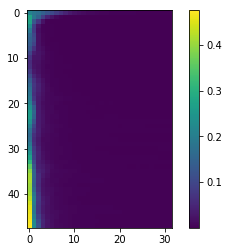

[[    29     29     29 ... 299990 299990 299990]
 [    33     34     35 ...     45     46     47]
 [     0      0      0 ...      0      0      0]]
(3, 368657)
signal_data.shape =  (300000, 48, 32)


In [3]:
# signal

data = []
#dir_name = 'signal_spha_time_nl_32x50_Te130_center_F200'
dir_name = 'signal_spha_cumulative_time_nl_32x50_Te130_dVrndVtx_3p0mSphere_F300'
#dir_name='background_10x20x64_allLight_dT32p0ns_1gamma_2p529MeV_rndVtx_3p0mSphere_rndDir_F200'
#dir_name = 'signal_10x20x64_allLight_dT32p0ns_Te130_center_F60'
i=0
for file in os.listdir(dir_name):
    if file.endswith(".npy"):
        #print(file)
        fn = os.path.join(dir_name, file)
        data.append(np.load(fn))
        i += 1
#    if i==165 :
#        break

print ('files loaded:', len(data))
signal_data = np.concatenate(tuple(data))

signal_data = signal_data[:,1:49,0:32]

print('signal (images, y, x): ', signal_data.shape)

signal_images=signal_data.shape[0]

#ev = np.swapaxes(signal_data, 0, 2)
#print('signal_data after 1st swapaxes = ',signal_data.shape)
#print('ev after 1st swapaxes = ',ev.shape)
#ev = np.swapaxes(ev, 1, 2)
#print('ev after 2nd swapaxes = ',ev.shape)
ev_display = signal_data[92854] #[5] #f1 evt=497, f2 evt=30
input_shape=ev_display.shape
print('image size:', input_shape)
plt.imshow(ev_display)
plt.colorbar()
plt.show()

#signal_short = signal_data[:, :1, :2]
strange_events = np.array(np.where(signal_data>2.5))
print(strange_events)
print(strange_events.shape)
#print(signal_data[0:1]
print('signal_data.shape = ',signal_data.shape)
#print('signal_short.shape = ',signal_short.shape)
#print(signal_short)

files loaded: 300
background_data.shape =  (300000, 50, 32)
background_data.shape =  (300000, 50, 32)
background (images, y, x):  (300000, 48, 32)
image size: (48, 32)


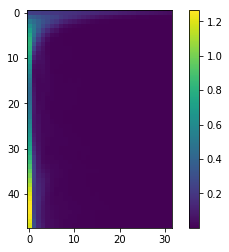

In [4]:
# background

data = []
file_sum = []
#dir_name='background_spha_time_nl_32x50_1el_2p529MeV_center_rndDir_F200'
dir_name='background_spha_cumulative_time_nl_32x50_1el_2p529MeV_dVrndVtx_3p0mSphere_rndDir_F300'
#dir_name='background_10x20x64_allLight_dT32p0ns_1gamma_2p529MeV_dVrndVtx_3p0mSphere_rndDir_F200'
#dir_name='background_10x20x64_allLight_dT32p0ns_C10_center'
#dir_name='background_10x20x64_allLight_dT32p0ns_C10_dVrndVtx_3p0mSphere'
i = 0
for file in os.listdir(dir_name):
#    print('i = ',i)
    if file.endswith(".npy"):
        fn = os.path.join(dir_name, file)
        file_data = np.load(fn)
#        file_data = file_data[file_data.sum(-1).sum(-1).sum(-1)!=0]
        file_sum.append(file_data.sum(-1).sum(-1).sum(-1))
        if i==0:
            data.append(file_data)
        if file_sum[i]!=file_sum[i-1] and i>0 : #this can probably happen to Sl data (need to check...)
#        if i>0:
            data.append(file_data)
    i += 1
#    if i==165: #360
#        break

print ('files loaded:', len(data))
background_data = np.concatenate(tuple(data))
data = file_data
        
print('background_data.shape = ',background_data.shape)
background_data = background_data[background_data.sum(-1).sum(-1)!=0]
print('background_data.shape = ',background_data.shape)
#print ('files loaded:', len(data))
#background_data = np.concatenate(tuple(data))

background_data = background_data[:,1:49,0:32]

print('background (images, y, x): ', background_data.shape)

background_images=background_data.shape[0]

#ev = np.swapaxes(background_data, 1, 3)
#print('signal_data after 1st swapaxes = ',background_data.shape)
#print('ev after 1st swapaxes = ',ev.shape)
#ev = np.swapaxes(ev, 2, 3)
#print('ev after 2nd swapaxes = ',ev.shape)
ev_display = background_data[497]
input_shape=ev_display.shape
print('image size:', input_shape)
plt.imshow(ev_display)
plt.colorbar()
plt.show()


In [5]:
# signal type 2

#data = []
#for file in os.listdir("signal_type2_simple"):
#    if file.endswith(".npy"):
#        fn = os.path.join("signal_type2_simple", file)
#        data.append(np.load(fn))pe

#print ('files loaded:', len(data))
#signal_type2_data = np.concatenate(tuple(data))

#print('signal type2 (images, y, x): ', signal_type2_data.shape)

#signal_type2_images=signal_type2_data.shape[0]

#ev = background_type2_data[1]
#input_shape=ev.shape
#print('image size:', input_shape)
#plt.imshow(ev)
#plt.colorbar()
#plt.show()


### create labels and rescale data

In [6]:
labels = np.array([1] * signal_images + [0] * background_images)
print('labels.shape = ',labels.shape)
data=np.concatenate((signal_data, background_data))
signal_data = []
background_data = []
#data = data[:, 1:50, :]
print (data.shape)
print(np.argwhere(np.isnan(data)))
N = data.shape[0]
#print(data[:2, :, :])
data = data.reshape(N, 48*32)

#data = data.reshape(1, N, 49, 5)
#print (data.shape)
#data = data.swapaxes(0, 1)
#data = data.swapaxes(1, 2)
#data = data.swapaxes(2, 3)
print (data.shape)
#print(data[:2, :])

labels.shape =  (600000,)
(600000, 48, 32)
[]
(600000, 1536)


### split into training and test samples

In [7]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.10, random_state=42)

print('images:', trainX.shape, testX.shape)
print('labels:', trainY.shape, testY.shape)


#trainY = to_categorical(trainY, num_classes=2)
#testY = to_categorical(testY, num_classes=2)

images: (540000, 1536) (60000, 1536)
labels: (540000,) (60000,)


In [8]:
print('train min = ', np.amin(trainX))
print('train max = ', np.amax(trainX))
print('train mean = ',trainX.mean())

print(trainX[trainX[:,:]>2.5])
print(np.where(trainX>2.5))

where_are_NaNs = np.isnan(trainX)
#trainX[where_are_NaNs] = 0
#print('min = ', np.amin(trainX))

print('test min = ', np.amin(testX))
print('test max = ', np.amax(testX))
where_are_NaNs = np.isnan(testX)
#print(where_are_NaNs)
#testX[where_are_NaNs] = 0
#print('min = ', np.amin(testX))

#scaler = StandardScaler().fit(trainX)
#trainX = scaler.transform(trainX)
#testX = scaler.transform(testX)

print('scaled train min = ', np.amin(trainX))
print('scaled train max = ', np.amax(trainX))
print('scaled test min = ', np.amin(testX))
print('scaled test max = ', np.amax(testX))

train min =  7.697299965622094e-07
train max =  7.7190147399574185
train mean =  0.03633896965211217
[2.54109629 2.58237914 2.5924363  ... 2.82974743 2.67448644 2.61482065]
(array([     1,      1,      1, ..., 539991, 539991, 539994]), array([ 864,  896,  928, ..., 1472, 1504, 1504]))
test min =  2.53270386090489e-06
test max =  7.719014739957017
scaled train min =  7.697299965622094e-07
scaled train max =  7.7190147399574185
scaled test min =  2.53270386090489e-06
scaled test max =  7.719014739957017


### functions

In [42]:
def createModel():
    model = Sequential()
    model.add(Dense(800, activation='relu',input_shape=(48*32,))) 
#    model.add(LocallyConnected2D(32, (7, 1), padding='valid', strides=(7,1), input_shape=(49,5,1))) #h=7, w=5
#    model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2, 1),strides=(1,1))) #h = 24, w = 2
    #model.add(Dropout(0.1))
    
#    model.add(Conv2D(64, (4, 2), padding='valid', activation='relu')) #h=4, w =4
#    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1))) #h=3, w=3
    #model.add(Dropout(0.1))
    
#    model.add(Conv2D(128, (2, 2), padding='same', activation='relu')) #h=2, w=2
#    model.add(MaxPooling2D(pool_size=(2, 2))) #h=1, w=1
   # model.add(Dropout(0.5))
 #
 #   model.add(Conv2D(30, (3, 3), activation='relu'))
 #   model.add(MaxPooling2D(pool_size=(2, 2)))
 #   model.add(Dropout(0.25))
 
#   model.add(Flatten())
    model.add(Dense(800, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(512, activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.25))
    #model.add(Dense(16, activation='relu'))
    #model.add(Dropout(0.25))
    #model.add(Dense(8, activation='relu'))
    #model.add(Dropout(0.25))
    #model.add(Dense(4, activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
     
    return model

In [43]:
my_network=createModel()

In [44]:
batch_size = 256
epochs = 50

my_network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
print('The crash is right after this')
history = my_network.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(testX, testY))
print('The crash is right after this 2')
my_network.evaluate(testX, testY)

The crash is right after this
Train on 540000 samples, validate on 60000 samples
Epoch 1/50
540000/540000 [==============================] - 15s 28us/step - loss: 0.6868 - acc: 0.5481 - val_loss: 0.6849 - val_acc: 0.5515
Epoch 2/50
540000/540000 [==============================] - 15s 27us/step - loss: 0.6844 - acc: 0.5534 - val_loss: 0.6870 - val_acc: 0.5539
Epoch 3/50
540000/540000 [==============================] - 13s 25us/step - loss: 0.6836 - acc: 0.5552 - val_loss: 0.6856 - val_acc: 0.5452
Epoch 4/50
540000/540000 [==============================] - 15s 27us/step - loss: 0.6832 - acc: 0.5561 - val_loss: 0.6814 - val_acc: 0.5616
Epoch 5/50
540000/540000 [==============================] - 12s 23us/step - loss: 0.6828 - acc: 0.5566 - val_loss: 0.6822 - val_acc: 0.5573
Epoch 6/50
540000/540000 [==============================] - 12s 22us/step - loss: 0.6825 - acc: 0.5575 - val_loss: 0.6869 - val_acc: 0.5569
Epoch 7/50
540000/540000 [==============================] - 12s 23us/step - los

[0.681151621500651, 0.5611833333333334]

Text(0.5,1,'Accuracy Curves')

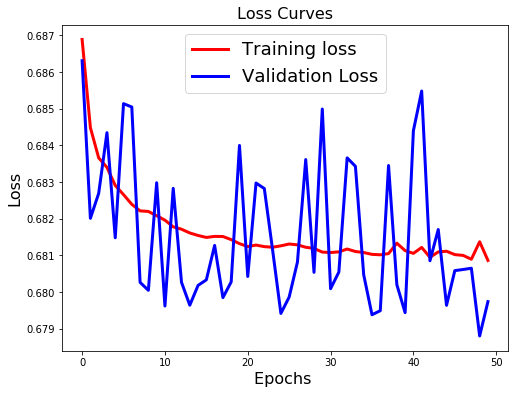

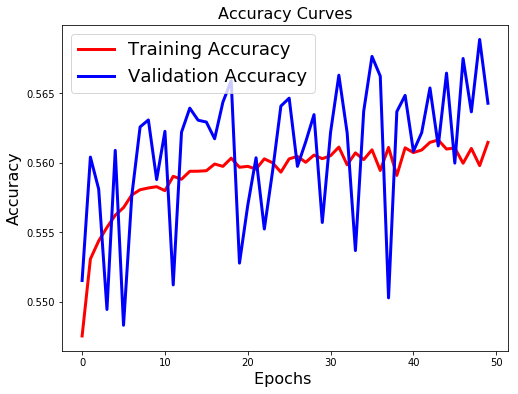

In [40]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


predY.shape =  (60000, 1)
[[0.40484694]
 [0.5249859 ]
 [0.40038928]
 [0.42892   ]
 [0.3600754 ]
 [0.50189304]
 [0.4356951 ]
 [0.58804005]
 [0.3912165 ]
 [0.44603345]]
[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]]

auc: 0.5961007306780334


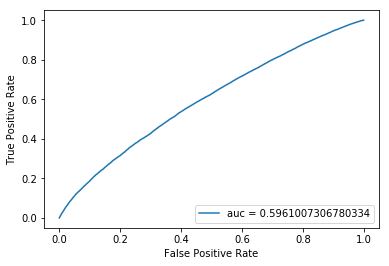

False positive rate: 0.0 
True positive rate: 0.00020075618161742565


In [41]:
predY = my_network.predict_proba(testX)
#predY = my_network.predict_proba(trainX)
#print
print('\npredY.shape = ',predY.shape)
print(predY[0:10])
print(testY[0:10])
auc = roc_auc_score(testY, predY)
print('\nauc:', auc)
#fpr, tpr, thr =roc_curve(np.argmax(testY, axis=1), np.argmax(predY, axis=1))
fpr, tpr, thr =roc_curve(testY, predY)
plt.plot(fpr, tpr, label = 'auc = ' + str(auc) )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
print('False positive rate:',fpr[1], '\nTrue positive rate:',tpr[1])

In [14]:
my_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1600)              2459200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 800)               1280800   
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
__________

(60000,)
(60000, 1)
[[1 1 0 ... 0 1 1]]
[[1.         0.40128025]
 [1.         0.51504213]
 [0.         0.43828091]
 [1.         0.44871813]
 [0.         0.42051491]
 [1.         0.5421679 ]
 [1.         0.44922876]
 [1.         0.5571546 ]
 [0.         0.4357546 ]
 [0.         0.44447994]]
(29887, 2)
[[1.         0.40128025]
 [1.         0.51504213]
 [1.         0.44871813]
 [1.         0.5421679 ]
 [1.         0.44922876]
 [1.         0.5571546 ]
 [1.         0.49746564]
 [1.         0.48969144]
 [1.         0.49969214]
 [1.         0.47574484]]
(30113, 2)
[[0.         0.43828091]
 [0.         0.42051491]
 [0.         0.4357546 ]
 [0.         0.44447994]
 [0.         0.61606306]
 [0.         0.47531423]
 [0.         0.4635464 ]
 [0.         0.45279369]
 [0.         0.43307781]
 [0.         0.5024929 ]]
Ntot_sig =  29887    Ntot_bkg =  30113
cut =  0.0    n_sig =  29887    Signal efficiency =  1.0
cut =  0.0    n_bkg =  30113    Background rejection =  1.0

cut =  0.05    n_sig =  2988

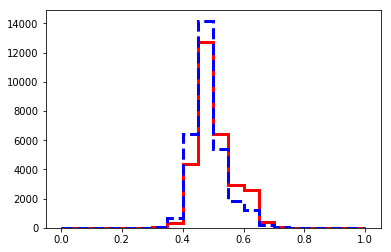

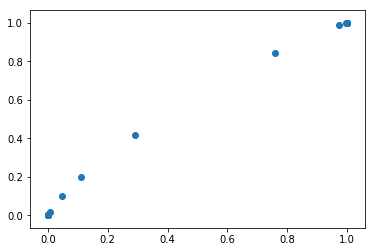

In [15]:
print(testY.shape)
testY = testY.reshape(60000,1)
print(predY.shape)
print(testY.T)
A = np.hstack((testY, predY))
print(A[0:10,:])
sig_out = A[A[:,0]>0]
print(sig_out.shape)
print(sig_out[0:10,:])
bkg_out = A[A[:,0]==0]
print(bkg_out.shape)
print(bkg_out[0:10,:])
sig = sig_out[:,1]
bkg = bkg_out[:,1]
##sig_hist, bin_edges = np.histogram(sig_out[:,1],bins=10, range=(0,1))
##plt.hist(sig_hist,bins=10, range=(0,1), histtype='step',ls='solid', alpha = 1.0, lw=3, color= 'r')
plt.hist(sig, bins=20, range=(0,1), histtype='step',ls='solid', alpha = 1.0, lw=3, color= 'r')
plt.hist(bkg, bins=20, range=(0,1), histtype='step',ls='dashed', alpha = 1.0, lw=3, color= 'b')
Ntot_sig = len(sig)
Ntot_bkg = len(bkg)
print('Ntot_sig = ',Ntot_sig,'   Ntot_bkg = ',Ntot_bkg)
roc_c = np.zeros((20,2))
for i in range(0,20):
    n_sig = len(sig[np.where(sig>0.05*i)])
    print('cut = ',0.05*i, '   n_sig = ', n_sig, '   Signal efficiency = ', n_sig/Ntot_sig)

    n_bkg = len(bkg[np.where(bkg>0.05*i)])
    if(n_bkg == 0): 
        r_bkg = 900
    else:
        r_bkg = Ntot_bkg/n_bkg
    print('cut = ',0.05*i, '   n_bkg = ', n_bkg, '   Background rejection = ', r_bkg)
    print('')
    roc_c[i][1] = n_sig/Ntot_sig
    roc_c[i][0] = n_bkg/Ntot_bkg
fig2 = plt.figure()
plt.scatter(roc_c[:,0],roc_c[:,1])
    #for i in range(0,100):  
#    roc_c[i][1] = n_sig/Ntot_sig
#    roc_c[i][0] = n_bkg/Ntot_bkg
#plt.hist2d(roc_c[:,0],roc_c[:,1])

In [ ]:
# background

data = None
file_sum = []
#dir_name='background_10x20x32_allLight_dT32p0ns_1el_2p529MeV_rndVtx_3p0mSphere_rndDir'
#dir_name='background_10x20x64_allLight_dT32p0ns_1el_2p529MeV_rndVtx_3p0mSphere_rndDir_F200'
dir_name='background_10x20x64_allLight_dT32p0ns_C10_center'
i = 0
for file in os.listdir(dir_name):
    print('i = ',i)
    if file.endswith(".npy"):
        fn = os.path.join(dir_name, file)
#        print('file_size = ',os.path.getsize(fn))
        file_data = np.load(fn)
#        file_data = file_data[file_data.sum(-1).sum(-1).sum(-1)!=0]
        file_sum.append(file_data.sum(-1).sum(-1).sum(-1).sum(-1))
        if data is not None:
            if file_sum[i]!=file_sum[i-1]:
#                data = np.concatenate([data, file_data]) 
                print('append i = ',i)
                print('pre-append data.shape = ',data.shape)
                data = np.append(data,file_data,axis=0)
                print('post-append data.shape = ',data.shape)
        else:
            data = file_data
    i += 1
    if i==100:
        break

print('data.shape = ',data.shape)
background_data = data[data.sum(-1).sum(-1).sum(-1)!=0]
print('background_data.shape = ',background_data.shape)
#print ('files loaded:', len(data))
#background_data = np.concatenate(tuple(data))

print('background (images, y, x): ', background_data.shape)

background_images=background_data.shape[0]

ev = np.swapaxes(background_data, 1, 3)
print('signal_data after 1st swapaxes = ',background_data.shape)
print('ev after 1st swapaxes = ',ev.shape)
ev = np.swapaxes(ev, 2, 3)
print('ev after 2nd swapaxes = ',ev.shape)
ev_display = ev[799][15]
input_shape=ev_display.shape
print('image size:', input_shape)
plt.imshow(ev_display)
plt.colorbar()
plt.show()